In [1]:
# Import modules.

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)
import geopandas as gpd
import os

os.environ['GDAL_DATA'] = os.environ['CONDA_PREFIX'] + r'\Library\share\gdal'
os.environ['PROJ_LIB'] = os.environ['CONDA_PREFIX'] + r'\Library\share'

In [2]:
# Estabilsh file path from which to source .csv file.
file_path = "..\Data_Files\suicide-lghc-indicator-21\suicide-lghc-indicator-21.csv"

# Use Pandas to read csv.
suicide_raw = pd.read_csv(file_path)

# Convert to DataFrame.
suicide_df = pd.DataFrame(suicide_raw)

# Display DataFrame
#suicide_df

# California

In [3]:
# ISOLATE ALL ROWS CONTAINING CALIFORNIA

# Grab rows containing 'CALIFORNIA' in 'Geography'.
cont_cali = suicide_df['Geography'] == 'CALIFORNIA'
suicide_cali = suicide_df[cont_cali]

# Reset index to a usable format.
suicide_cali = suicide_cali.reset_index()
suicide_cali = suicide_cali.drop(columns=['Indicator', 'index', 'Rate', 'Age Adjusted Rate'])

# Display Data Frame
#suicide_cali

### California - Year Ranges only - Total

In [4]:
# SORT OUR TOTAL AND YEAR GROUPS, NOT SOLITARY YEARS.

# Grab rows containing 'Total' in 'Strata Name'.
cali_bytotal = suicide_cali['Strata Name'] == 'Total'
suicide_cali_total = suicide_cali[cali_bytotal]

# Reset index to a usable format.
suicide_cali_total = suicide_cali_total.reset_index()

# Drop rows containing solitary years.
suicide_cali_total = suicide_cali_total.drop(suicide_cali_total.index[0:18])

# Reset index to usable format.
suicide_cali_total = suicide_cali_total.reset_index()
suicide_cali_total = suicide_cali_total.drop(columns=['index', 'level_0'])

# Add column to normalize number of suicides against the total population in a given year range.
suicide_cali_total['Suicides for every 100K'] = ((suicide_cali_total['Numerator'] / suicide_cali_total['Denominator']) * 100000)

# Display DataFrame
#suicide_cali_total

### Total California Suicides: 2000 - 2017

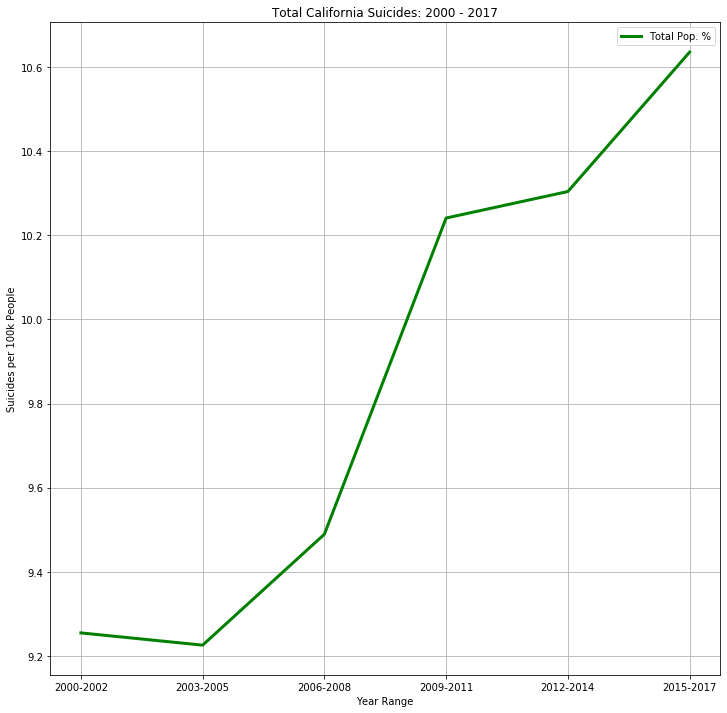

In [13]:
# PLOT THE TOTAL % OF THE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
x_axis = suicide_cali_total['Year'].tolist()
y_axis = suicide_cali_total['Suicides for every 100K'].tolist()

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(12, 12))

# PLot x and y values, esbablish line formatting, plot a grid.
plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Total Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Suicides per 100k People')

# Save figure to .png file.
plt.savefig('..\Output_Figures\Total California Suicides.png')

## California - Sex

In [14]:
# ISOLATE CALIFORNIA DATA BY SEX.

# Grab rows containing 'Sex' in the 'Strata' column.
cali_bysex = suicide_cali['Strata'] == 'Sex'
suicide_cali_sex = suicide_cali[cali_bysex]

# Reset index to a usable format.
suicide_cali_sex = suicide_cali_sex.reset_index()
suicide_cali_sex = suicide_cali_sex.drop(columns=['index'])

# Display DataFrame.
#suicide_cali_sex

### California - Sex - Female

In [15]:
# SORT OUT FEMALE AND YEAR GROUPS, NOT SOLITARY YEARS.

# Grab rows containting 'Female' in the 'Strata Name' column.
cali_byfemale = suicide_cali_sex['Strata Name'] == 'Female'
suicide_cali_female = suicide_cali_sex[cali_byfemale]

# Reset the index to a usable format.
suicide_cali_female = suicide_cali_female.reset_index()
suicide_cali_female = suicide_cali_female.drop(columns=['index'])

# Drop rows containing solitary years.
suicide_cali_female = suicide_cali_female.drop(suicide_cali_female.index[0:18])

# Reset index to a usable format.
suicide_cali_female = suicide_cali_female.reset_index()
suicide_cali_female = suicide_cali_female.drop(columns=['index'])

# Add column to normalize number of suicides against the female population in a given year range. 
suicide_cali_female['Suicides for every 100K'] = ((suicide_cali_female['Numerator'] / suicide_cali_female['Denominator']) * 100000)

# Display DataFrame.
#suicide_cali_female

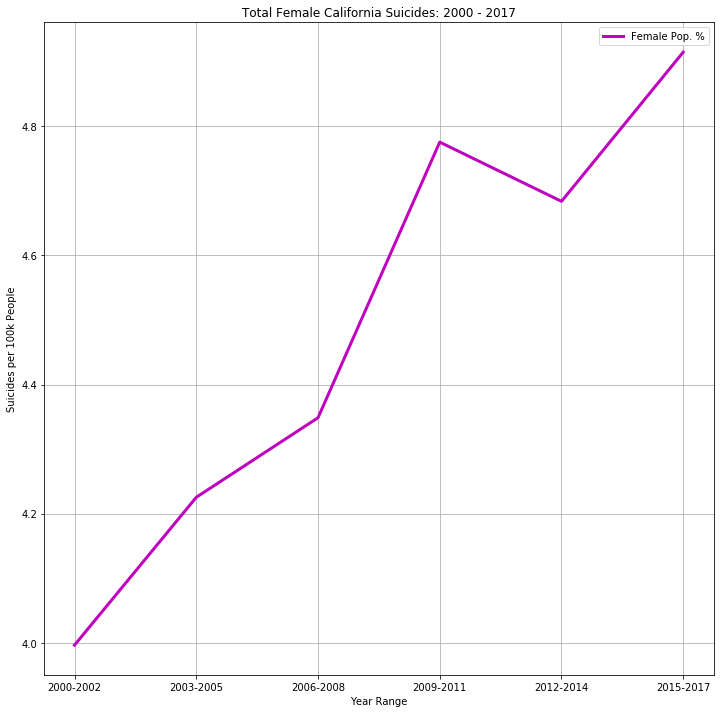

In [21]:
# PLOT THE FEMALE % OF THE FEMALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
x_female = suicide_cali_female['Year'].tolist()
y_female = suicide_cali_female['Suicides for every 100K'].tolist()

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(12, 12))

# PLot x and y values, esbablish line formatting, plot a grid.
plt.plot(x_female, y_female, 'm', linewidth=3, label='Female Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Female California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Suicides per 100k People')

# Save figure to .png file.
plt.savefig('..\Output_Figures\Total Female California Suicides.png')

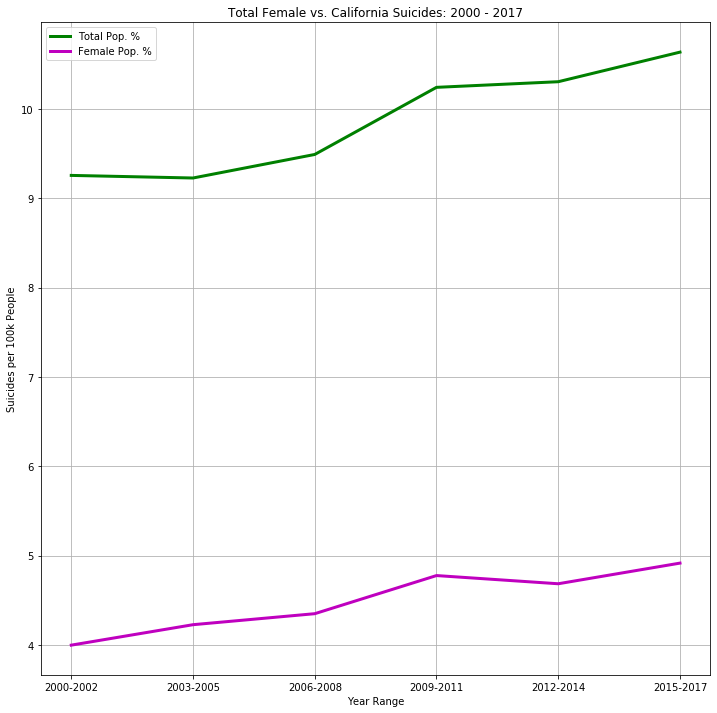

In [22]:
# PLOT THE TOTAL AND FEMALE % OF THE TOTAL AND FEMALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(12, 12))

# PLot x and y values for female and California data sets, esbablish line formatting, plot a grid.
plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Total Pop. %')
plt.plot(x_female, y_female, 'm', linewidth=3, label='Female Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Female vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Suicides per 100k People')

# Save figure to .png file.
plt.savefig('..\Output_Figures\Total Female vs. California Suicides.png')

### California - Sex - Male

In [23]:
# SORT OUT MALE AND YEAR GROUPS, NOT SOLITARY YEARS.

# Grab rows containting 'Male' in the 'Strata Name' column.
cali_bymale = suicide_cali_sex['Strata Name'] == 'Male'
suicide_cali_male = suicide_cali_sex[cali_bymale]

# Reset the index to a usable format.
suicide_cali_male = suicide_cali_male.reset_index()
suicide_cali_male = suicide_cali_male.drop(columns=['index'])

# Drop rows containing solitary years.
suicide_cali_male = suicide_cali_male.drop(suicide_cali_male.index[0:18])

# Reset the index to a usable format.
suicide_cali_male = suicide_cali_male.reset_index()
suicide_cali_male = suicide_cali_male.drop(columns=['index'])

# Add column to normalize number of suicides against the female population in a given year range. 
suicide_cali_male['Suicides for every 100K'] = ((suicide_cali_male['Numerator'] / suicide_cali_male['Denominator']) * 100000)

# Display DataFrame.
#suicide_cali_male

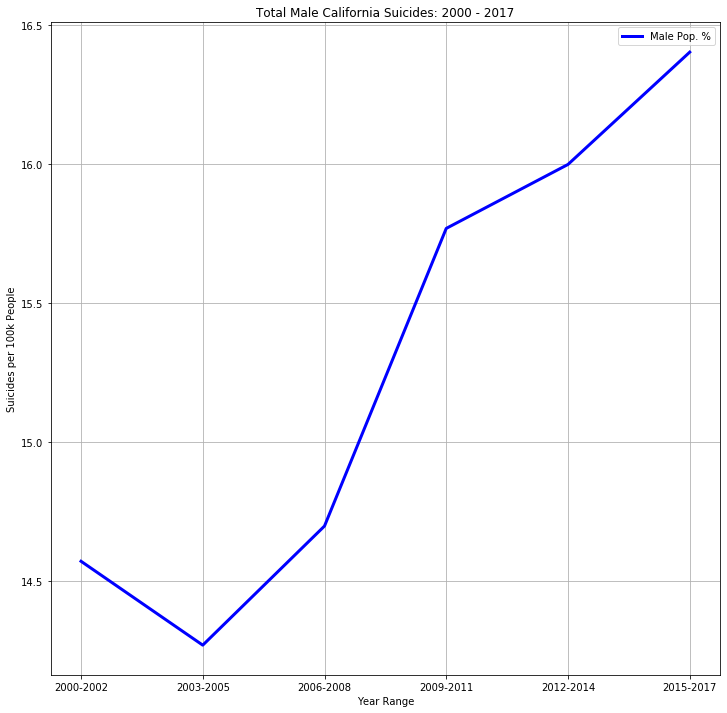

In [24]:
# PLOT THE MALE % OF THE MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish x and y values by converting column items into a list.
x_male = suicide_cali_male['Year'].tolist()
y_male = suicide_cali_male['Suicides for every 100K'].tolist()

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(12, 12))

# PLot x and y values, esbablish line formatting, plot a grid.
plt.plot(x_male, y_male, 'b', linewidth=3, label='Male Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Male California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Suicides per 100k People')

# Save figure to .png file.
plt.savefig('..\Output_Figures\Total Male California Suicides.png')

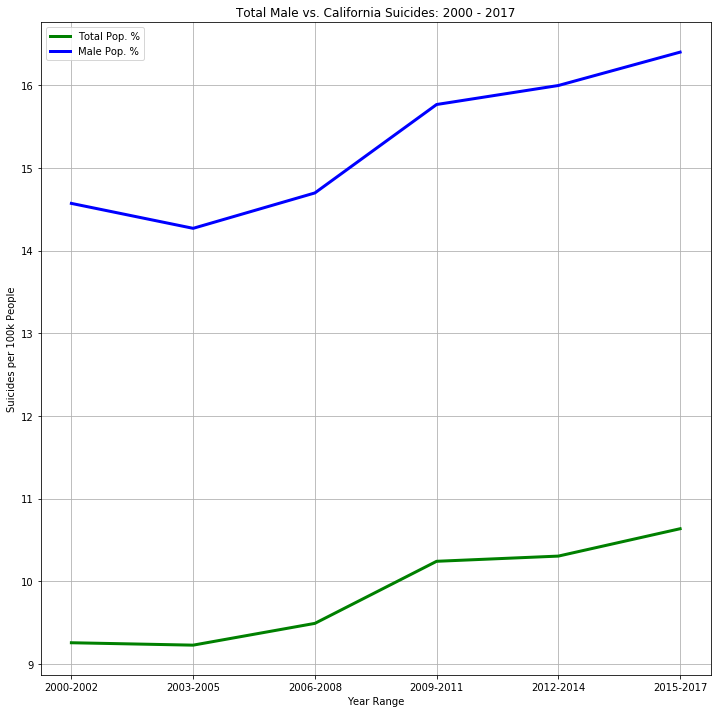

In [25]:
# PLOT THE TOTAL AND MALE % OF THE TOTAL AND MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(12, 12))

# PLot x and y values for male and California data sets, esbablish line formatting, plot a grid.
plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Total Pop. %')
plt.plot(x_male, y_male, 'b', linewidth=3, label='Male Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Male vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Suicides per 100k People')

# Save figure to .png file.
plt.savefig('..\Output_Figures\Total Male vs. California Suicides.png')

## California - Sex - Overall Analysis

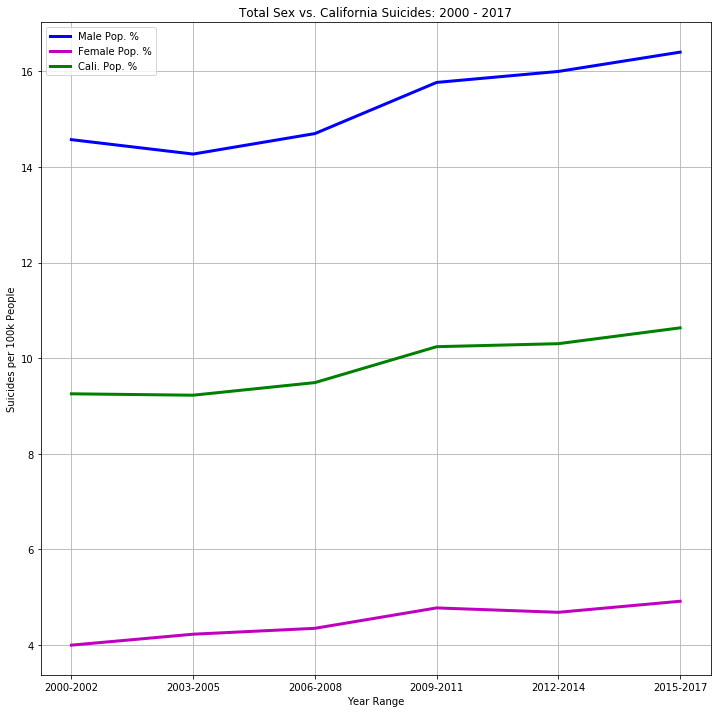

In [26]:
# PLOT THE TOTAL, FEMALE, AND MALE % OF THE TOTAL, FEMALE, AND MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(12, 12))

# PLot x and y values for male, female, and California data sets, esbablish line formatting, plot a grid.
males = plt.plot(x_male, y_male, 'b', linewidth=3, label='Male Pop. %')
females = plt.plot(x_female, y_female, 'm', linewidth=3, label='Female Pop. %')
total = plt.plot(x_axis, y_axis, 'g', linewidth=3, label='Cali. Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Sex vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Suicides per 100k People')

# Save figure to .png file.
plt.savefig('..\Output_Figures\Total Sex vs. California Suicides.png')

## California - Race

In [27]:
# ISOLATE CALIFORNIA DATA BY RACE.

# Grab rows containing 'Race' in the 'Strata' column.
cali_byrace = suicide_cali['Strata'] == 'Race/Ethnicity'
suicide_cali_race = suicide_cali[cali_byrace]

# Reset index to a usable format.
suicide_cali_race = suicide_cali_race.reset_index()
suicide_cali_race = suicide_cali_race.drop(columns=['index'])

# Display DataFrame.
#suicide_cali_race

In [28]:
# CREATES ALL TABLES FOR THE VARIOUS RACES AND THEIR CONTAINING YEARS, CALIFORNIA WIDE.

# Establish the function I want to run on each race group
def create_race_table(current_race):
    
    global suicide_cali_races
    
    # Grab rows containting i, the current selecte race in the 'Strata Name' column.
    cali_byraces = suicide_cali_race['Strata Name'] == i
    suicide_cali_races = suicide_cali_race[cali_byraces]
    
    # Reset the index to a usable format.
    suicide_cali_races = suicide_cali_races.reset_index()
    suicide_cali_races = suicide_cali_races.drop(columns=['index'])
    
    # Add column to normalize number of suicides against the current race selection population in a given year range.
    suicide_cali_races['Suicides for every 100K'] = ((suicide_cali_races['Numerator'] / suicide_cali_races['Denominator']) * 100)
    
    # Returns variable for use outside of the function.
    return suicide_cali_races;


# Creates an array of of the unique races under the column 'Strata Name'.
census_array = suicide_cali_race['Strata Name'].unique()

# Converts array to list.
census_list = census_array.tolist()

# For loop to iterrate through the available races and call the function. 
for i in census_list:
    
    if i in census_list[0]:
        create_race_table(i)
        suicide_cali_race1 = suicide_cali_races
        
    elif i in census_list[1]:
        create_race_table(i)
        suicide_cali_race2 = suicide_cali_races
        
    elif i in census_list[2]:
        create_race_table(i)
        suicide_cali_race3 = suicide_cali_races
        
    elif i in census_list[3]:
        create_race_table(i)
        suicide_cali_race4 = suicide_cali_races
        
    elif i in census_list[4]:
        create_race_table(i)
        suicide_cali_race5 = suicide_cali_races
        
    elif i in census_list[5]:
        create_race_table(i)
        suicide_cali_race6 = suicide_cali_races
        
    elif i in census_list[6]:
        create_race_table(i)
        suicide_cali_race7 = suicide_cali_races
        


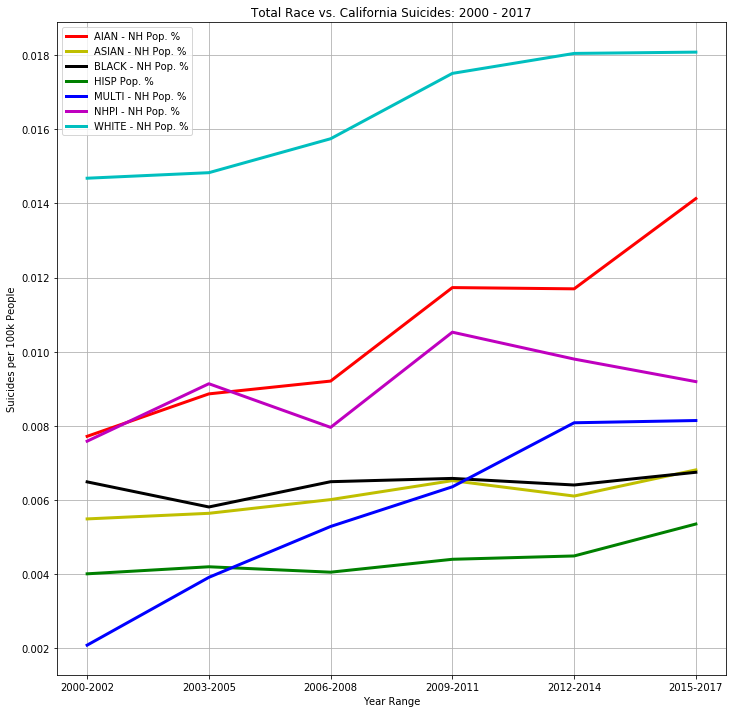

In [30]:
# PLOT THE TOTAL, FEMALE, AND MALE % OF THE TOTAL, FEMALE, AND MALE POPULATION IN EACH YEAR GROUP OVER TIME.

# Establish all y value sets
y_race1 = suicide_cali_race1['Suicides for every 100K'].tolist()
y_race2 = suicide_cali_race2['Suicides for every 100K'].tolist()
y_race3 = suicide_cali_race3['Suicides for every 100K'].tolist()
y_race4 = suicide_cali_race4['Suicides for every 100K'].tolist()
y_race5 = suicide_cali_race5['Suicides for every 100K'].tolist()
y_race6 = suicide_cali_race6['Suicides for every 100K'].tolist()
y_race7 = suicide_cali_race7['Suicides for every 100K'].tolist()

# Establish the size of the plot. Standard for all plots in this project.
plt.figure(figsize=(12, 12))

# PLot x and y values for all race data sets, esbablish line formatting, plot a grid.
race1 = plt.plot(x_axis, y_race1, 'r', linewidth=3, label='AIAN - NH Pop. %')
race2 = plt.plot(x_axis, y_race2, 'y', linewidth=3, label='ASIAN - NH Pop. %')
race3 = plt.plot(x_axis, y_race3, 'k', linewidth=3, label='BLACK - NH Pop. %')
race4 = plt.plot(x_axis, y_race4, 'g', linewidth=3, label='HISP Pop. %')
race5 = plt.plot(x_axis, y_race5, 'b', linewidth=3, label='MULTI - NH Pop. %')
race6 = plt.plot(x_axis, y_race6, 'm', linewidth=3, label='NHPI - NH Pop. %')
race7 = plt.plot(x_axis, y_race7, 'c', linewidth=3, label='WHITE - NH Pop. %')
plt.grid()

# Place the legend on the plot.
plt.legend(loc="best")

# Establish titles and labeling.
plt.title('Total Race vs. California Suicides: 2000 - 2017')
plt.xlabel('Year Range')
plt.ylabel('Suicides per 100k People')

# Save figure to .png file.
plt.savefig('..\Output_Figures\Total Race vs. California Suicides.png')

# All Counties

In [31]:
# ISOLATE ALL ROWS NOT CONTAINING CALIFORNIA.

# Grab all rows not containing 'CALIFORNIA' in 'Geography'.
all_counties = suicide_df['Geography'] != 'CALIFORNIA'
suicide_counties = suicide_df[all_counties]

# Reset index to usable format. Drop superfluous columns.
suicide_counties = suicide_counties.reset_index()
suicide_counties = suicide_counties.drop(columns=['Indicator', 'index', 'Rate', 'Age Adjusted Rate'])

# Display DataFrame.
#suicide_counties

## Counties - Sex

In [32]:
# ISOLATE ROWS CONTAINING SEX.

# Grab all rows not containing 'Sex' in 'Strata'.
county_bysex = suicide_counties['Strata'] == 'Sex'
suicide_county_sex = suicide_counties[county_bysex]

# Reset index to usable format.
suicide_county_sex = suicide_county_sex.reset_index()
suicide_county_sex = suicide_county_sex.drop(columns=['index'])

# Display DataFrame.
#suicide_county_sex

### Counties - Total - "2000-2002"

In [33]:
# ISOLATE BY YEAR GROUP 00-02.

# Grab rows containing '2000-2002' in the 'Year' column.
count_sex_by00_02 = suicide_county_sex['Year'] == '2000-2002'
count_sex_00_02 = suicide_county_sex[count_sex_by00_02]

# Reset index to usable format.
count_sex_00_02 = count_sex_00_02.reset_index()
count_sex_00_02 = count_sex_00_02.drop(columns=['index'])

# Display DataFrame
#count_sex_00_02

In [34]:
# ISOLATE BY 'TOTAL' in 00-02.

# Grab rows containing 'Total' in the 'Strata Name' column.
count_total_by00_02 = count_sex_00_02['Strata Name'] == 'Total'
count_total_00_02 = count_sex_00_02[count_total_by00_02]

# Reset index to usable format.
count_total_00_02 = count_total_00_02.reset_index()
count_total_00_02 = count_total_00_02.drop(columns=['index'])

# Add column to normalize number of suicides against the total population in a given year range. 
count_total_00_02['Suicides for every 100K'] = ((count_total_00_02['Numerator'] / count_total_00_02['Denominator']) * 100000)

# Display DataFrame.
#count_total_00_02

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


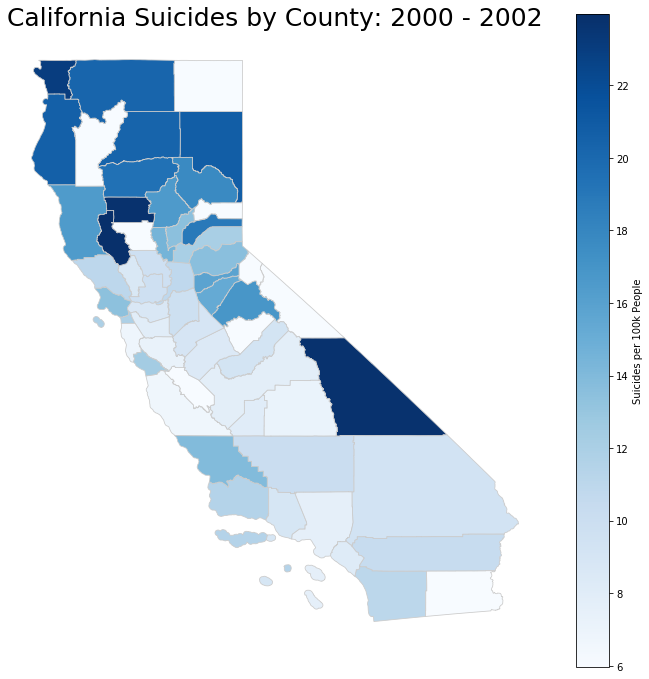

In [52]:
# Set the file path for the shape file.
fp = '..\Data_Files\CA_Counties\CA_Counties_TIGER2016.shp'

# Create a DataFrame from the shape file.
map_df = gpd.read_file(fp)

# Join shape DataFrame with DataFrame containing our values.
merged = map_df.set_index('NAME').join(count_total_00_02.set_index('Geography'))

# Set the variable column to use in the color map, the min/max values, and the figure size.
variable = 'Suicides for every 100K'
vmin, vmax = count_total_00_02['Suicides for every 100K'].min(), count_total_00_02['Suicides for every 100K'].max()
fig, ax = plt.subplots(1, figsize=(12, 12))

# Plot the merged DataFrame and apply formatting.
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Plot the colorbar and apply formatting.
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Set lables and titles.
cbar.set_label('Suicides per 100k People')
ax.set_title('California Suicides by County: 2000 - 2002', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Save figure to .png file. 
fig.savefig("..\Output_Figures\California_Suicide_Counties_00_02.png", dpi=300)

### Counties - Total - "2003-2005"

In [37]:
# ISOLATE BY YEAR GROUP 03-05.

# Grab rows containing '2003-2005' in the 'Year' column.
count_sex_by03_05 = suicide_county_sex['Year'] == '2003-2005'
count_sex_03_05 = suicide_county_sex[count_sex_by03_05]

# Reset index to usable format.
count_sex_03_05 = count_sex_03_05.reset_index()
count_sex_03_05 = count_sex_03_05.drop(columns=['index'])

# Display DataFrame
#count_sex_03_05

In [38]:
# ISOLATE BY 'TOTAL' in 03-05.

# Grab rows containing 'Total' in the 'Strata Name' column.
count_total_by03_05 = count_sex_03_05['Strata Name'] == 'Total'
count_total_03_05 = count_sex_03_05[count_total_by03_05]

# Reset index to usable format.
count_total_03_05 = count_total_03_05.reset_index()
count_total_03_05 = count_total_03_05.drop(columns=['index'])

# Add column to normalize number of suicides against the total population in a given year range. 
count_total_03_05['Suicides for every 100K'] = ((count_total_03_05['Numerator'] / count_total_03_05['Denominator']) * 100000)

# Display DataFrame.
#count_total_03_05

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


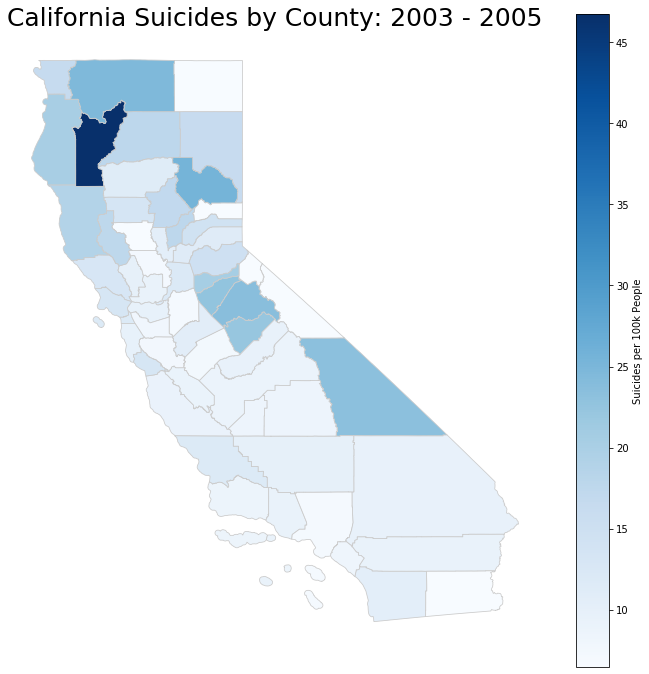

In [53]:
# Join shape DataFrame with DataFrame containing our values.
merged = map_df.set_index('NAME').join(count_total_03_05.set_index('Geography'))

# Set the variable column to use in the color map, the min/max values, and the figure size.
variable = 'Suicides for every 100K'
vmin, vmax = count_total_03_05['Suicides for every 100K'].min(), count_total_03_05['Suicides for every 100K'].max()
fig, ax = plt.subplots(1, figsize=(12, 12))

# Plot the merged DataFrame and apply formatting.
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Plot the colorbar and apply formatting.
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Set lables and titles.
cbar.set_label('Suicides per 100k People')
ax.set_title('California Suicides by County: 2003 - 2005', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Save figure to .png file. 
fig.savefig("..\Output_Figures\California_Suicide_Counties_03_05.png", dpi=300)

### Counties - Sex - "2006-2008"

In [40]:
# ISOLATE BY YEAR GROUP 06-08.

# Grab rows containing '2006-2008' in the 'Year' column.
count_sex_by06_08 = suicide_county_sex['Year'] == '2006-2008'
count_sex_06_08 = suicide_county_sex[count_sex_by06_08]

# Reset index to usable format.
count_sex_06_08 = count_sex_06_08.reset_index()
count_sex_06_08 = count_sex_06_08.drop(columns=['index'])

# Display DataFrame.
#count_sex_06_08

In [41]:
# ISOLATE BY 'TOTAL' in 00-02.

# Grab rows containing 'Total' in the 'Strata Name' column.
count_total_by06_08 = count_sex_06_08['Strata Name'] == 'Total'
count_total_06_08 = count_sex_06_08[count_total_by06_08]

# Reset index to usable format.
count_total_06_08 = count_total_06_08.reset_index()
count_total_06_08 = count_total_06_08.drop(columns=['index'])

# Add column to normalize number of suicides against the total population in a given year range.
count_total_06_08['Suicides for every 100K'] = ((count_total_06_08['Numerator'] / count_total_06_08['Denominator']) * 100000)

# Display DataFrame.
#count_total_06_08

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


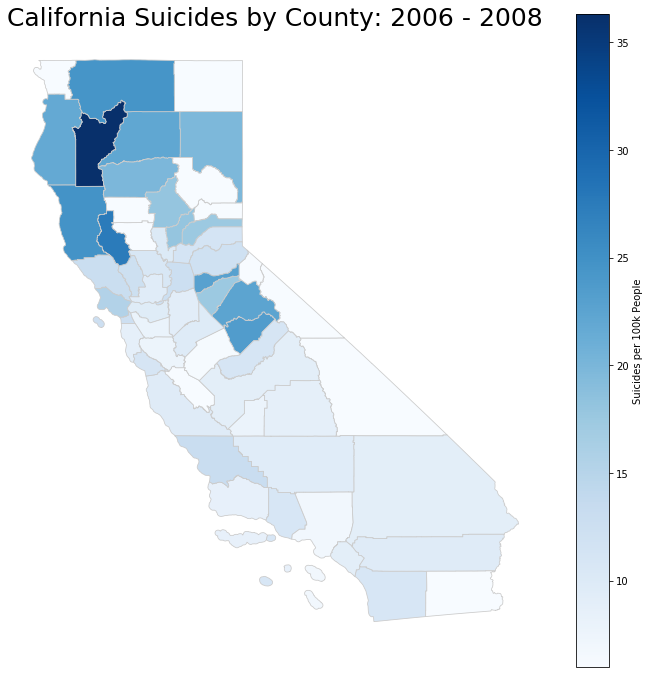

In [54]:
# Join shape DataFrame with DataFrame containing our values.
merged = map_df.set_index('NAME').join(count_total_06_08.set_index('Geography'))

# Set the variable column to use in the color map, the min/max values, and the figure size.
variable = 'Suicides for every 100K'
vmin, vmax = count_total_06_08['Suicides for every 100K'].min(), count_total_06_08['Suicides for every 100K'].max()
fig, ax = plt.subplots(1, figsize=(12, 12))

# Plot the merged DataFrame and apply formatting.
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Plot the colorbar and apply formatting.
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Set lables and titles.
cbar.set_label('Suicides per 100k People')
ax.set_title('California Suicides by County: 2006 - 2008', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Save figure to .png file. 
fig.savefig("..\Output_Figures\California_Suicide_Counties_06_08.png", dpi=300)

### Counties - Sex - "2009-2011"

In [43]:
# ISOLATE BY YEAR GROUP 09-11.

# Grab rows containing '2009-2011' in the 'Year' column.
count_sex_by09_11 = suicide_county_sex['Year'] == '2009-2011'
count_sex_09_11 = suicide_county_sex[count_sex_by09_11]

# Reset index to usable format.
count_sex_09_11 = count_sex_09_11.reset_index()
count_sex_09_11 = count_sex_09_11.drop(columns=['index'])

# Display DataFrame.
#count_sex_09_11

In [44]:
# ISOLATE BY 'TOTAL' in 09-11.

# Grab rows containing 'Total' in the 'Strata Name' column.
count_total_by09_11 = count_sex_09_11['Strata Name'] == 'Total'
count_total_09_11 = count_sex_09_11[count_total_by09_11]

# Reset index to usable format.
count_total_09_11 = count_total_09_11.reset_index()
count_total_09_11 = count_total_09_11.drop(columns=['index'])

# Add column to normalize number of suicides against the total population in a given year range.
count_total_09_11['Suicides for every 100K'] = ((count_total_09_11['Numerator'] / count_total_09_11['Denominator']) * 100000)

# Display DataFrame.
#count_total_09_11

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


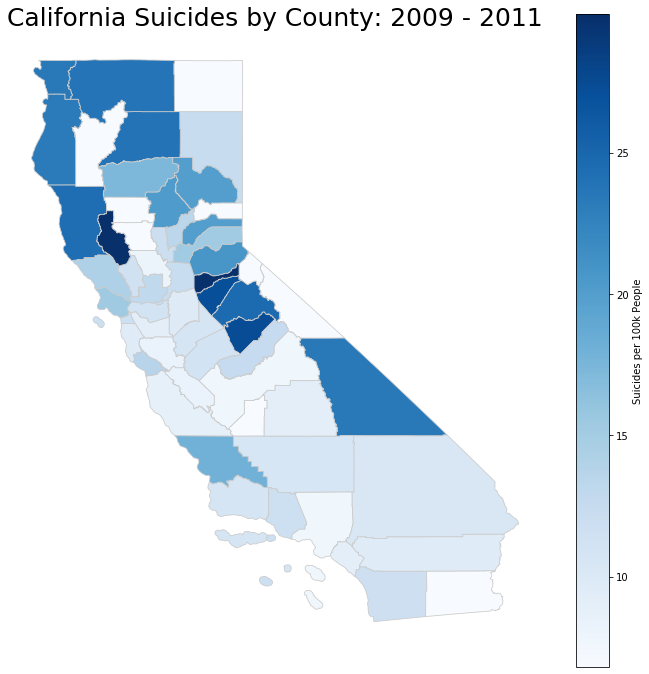

In [55]:
# Join shape DataFrame with DataFrame containing our values.
merged = map_df.set_index('NAME').join(count_total_09_11.set_index('Geography'))

# Set the variable column to use in the color map, the min/max values, and the figure size.
variable = 'Suicides for every 100K'
vmin, vmax = count_total_09_11['Suicides for every 100K'].min(), count_total_09_11['Suicides for every 100K'].max()
fig, ax = plt.subplots(1, figsize=(12, 12))

# Plot the merged DataFrame and apply formatting.
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Plot the colorbar and apply formatting.
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Set lables and titles.
cbar.set_label('Suicides per 100k People')
ax.set_title('California Suicides by County: 2009 - 2011', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Save figure to .png file. 
fig.savefig("..\Output_Figures\California_Suicide_Counties_09_11.png", dpi=300)

### Counties - Sex - "2012-2014"

In [46]:
# ISOLATE BY YEAR GROUP 12-14.

# Grab rows containing '2012-2014' in the 'Year' column.
count_sex_by12_14 = suicide_county_sex['Year'] == '2012-2014'
count_sex_12_14 = suicide_county_sex[count_sex_by12_14]

# Reset index to usable format.
count_sex_12_14 = count_sex_12_14.reset_index()
count_sex_12_14 = count_sex_12_14.drop(columns=['index'])

# Display DataFrame.
#count_sex_12_14

In [56]:
# ISOLATE BY 'TOTAL' in 12-14.

# Grab rows containing 'Total' in the 'Strata Name' column.
count_total_by12_14 = count_sex_12_14['Strata Name'] == 'Total'
count_total_12_14 = count_sex_12_14[count_total_by12_14]

# Reset index to usable format.
count_total_12_14 = count_total_12_14.reset_index()
count_total_12_14 = count_total_12_14.drop(columns=['index'])

# Add column to normalize number of suicides against the total population in a given year range.
count_total_12_14['Suicides for every 100K'] = ((count_total_12_14['Numerator'] / count_total_12_14['Denominator']) * 100000)

# Display DataFrame.
#count_total_12_14

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


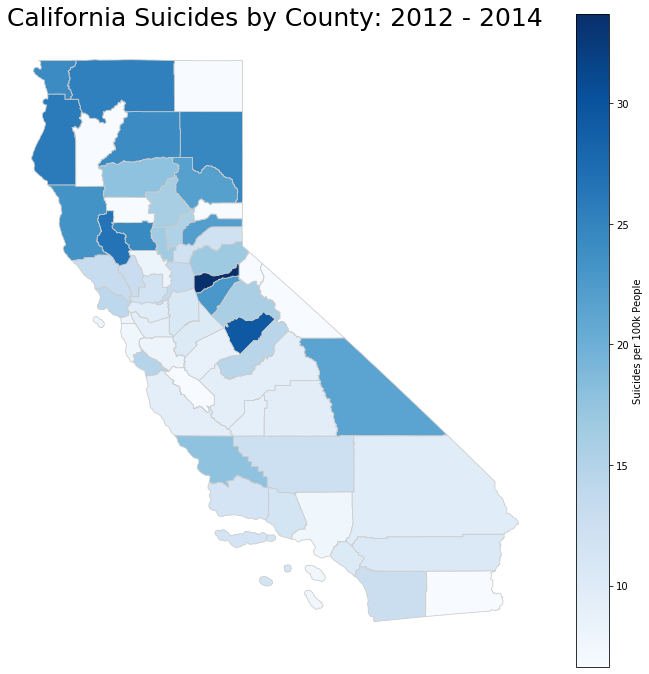

In [57]:
# Join shape DataFrame with DataFrame containing our values.
merged = map_df.set_index('NAME').join(count_total_12_14.set_index('Geography'))

# Set the variable column to use in the color map, the min/max values, and the figure size.
variable = 'Suicides for every 100K'
vmin, vmax = count_total_12_14['Suicides for every 100K'].min(), count_total_12_14['Suicides for every 100K'].max()
fig, ax = plt.subplots(1, figsize=(12, 12))

# Plot the merged DataFrame and apply formatting.
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Plot the colorbar and apply formatting.
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Set lables and titles.
cbar.set_label('Suicides per 100k People')
ax.set_title('California Suicides by County: 2012 - 2014', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Save figure to .png file. 
fig.savefig("..\Output_Figures\California_Suicide_Counties_12_14.png", dpi=300)

### Counties - Sex - "2015-2017"

In [49]:
# ISOLATE BY YEAR GROUP 15-17.

# Grab rows containing '2015-2017' in the 'Year' column.
count_sex_by15_17 = suicide_county_sex['Year'] == '2015-2017'
count_sex_15_17 = suicide_county_sex[count_sex_by15_17]

# Reset index to usable format.
count_sex_15_17 = count_sex_15_17.reset_index()
count_sex_15_17 = count_sex_15_17.drop(columns=['index'])

# Display DataFrame.
#count_sex_15_17

In [50]:
# ISOLATE BY 'TOTAL' in 15-17.

# Grab rows containing 'Total' in the 'Strata Name' column.
count_total_by15_17 = count_sex_15_17['Strata Name'] == 'Total'
count_total_15_17 = count_sex_15_17[count_total_by15_17]

# Reset index to usable format.
count_total_15_17 = count_total_15_17.reset_index()
count_total_15_17 = count_total_15_17.drop(columns=['index'])

# Add column to normalize number of suicides against the total population in a given year range.
count_total_15_17['Suicides for every 100K'] = ((count_total_15_17['Numerator'] / count_total_15_17['Denominator']) * 100000)

# Display DataFrame.
#count_total_15_17

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


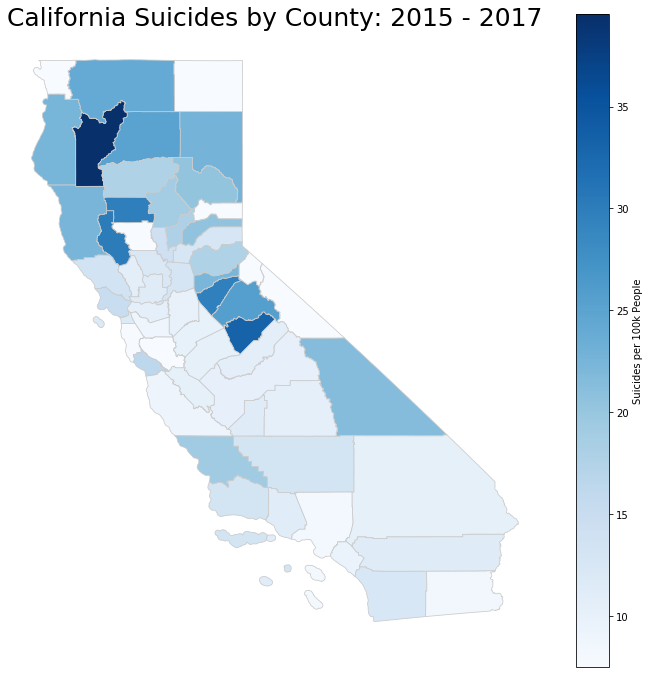

In [58]:
# Join shape DataFrame with DataFrame containing our values.
merged = map_df.set_index('NAME').join(count_total_15_17.set_index('Geography'))

# Set the variable column to use in the color map, the min/max values, and the figure size.
variable = 'Suicides for every 100K'
vmin, vmax = count_total_15_17['Suicides for every 100K'].min(), count_total_15_17['Suicides for every 100K'].max()
fig, ax = plt.subplots(1, figsize=(12, 12))

# Plot the merged DataFrame and apply formatting.
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')

# Plot the colorbar and apply formatting.
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# Set lables and titles.
cbar.set_label('Suicides per 100k People')
ax.set_title('California Suicides by County: 2015 - 2017', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Save figure to .png file. 
fig.savefig("..\Output_Figures\California_Suicide_Counties_15_17.png", dpi=300)